In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import butter, filtfilt

In [2]:
def calculate_value(img):
    b, g, r = cv2.split(img)
    value = np.mean(g)
    return value

In [3]:
def maxvalue(arr1, arr2):
    value = np.argmax(arr1)
    print(value)
    value = arr2[value]
    print(value)
    return value

In [4]:
def filter_butterworth_bandpass(arr, srate, length, band, order=5):
    try:
        (minFreq, maxFreq) = band
        nyq = srate / 2.0
        n = len(arr)
        pad_factor = max(1, 60 * srate / length)
        n_padded = int(n * pad_factor)
        padded = np.zeros(n_padded)
        padded[:n] = arr[:]
        
        filter = butter(order, [minFreq / nyq, maxFreq / nyq], 'bandpass')
        bandpassed = filtfilt(*filter, padded)
        bandpassed = bandpassed[:n]
        return bandpassed
    
    except ValueError:
        return ['error']

In [5]:
def detrend_signal(arr, win_size):
    if not isinstance(win_size, int):
        win_size = int(win_size)
    length = len(arr)
    norm = np.convolve(np.ones(length), np.ones(win_size), mode='same')
    mean = np.convolve(arr, np.ones(win_size), mode='same') / norm
    return (arr - mean) / mean
    

57 57
4
1.0714285714285714
64


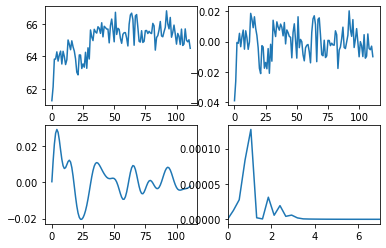

In [11]:
def main():
    cap = cv2.VideoCapture(0)
    face_cascade = cv2.CascadeClassifier('haarcascade_frontface.xml')
    
    signals = []
    
    i = 0
    is_detected = False
    x, y, w, h = 0, 0, 0, 0
    while 1: # < 10 *30:
        ok, frame = cap.read()
        if not ok:
            break
        
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.05, 5)
        if len(faces) > 0:
            max = 0

            for i in range(1,(len(faces))):
                if i == 1:
                    if faces[i-1][2] > faces[i][2]:
                        max = i-1
                    else:
                        max = i
                else:
                    if faces[i][2] > faces[max][2]:
                        max = i
                i += 1
            x, y, w, h = faces[max]
            cv2.rectangle(frame, (x+int(0.2*w),y+int(0.2*h)), (x+int(0.8*w), (y+int(0.8*h))), (0,0,255), 2)
                
        if w != 0:
            face = frame[y:y+h, x:x+w]
            
            value = calculate_value(face)
            signals.append(value)
                
        cv2.imshow('frame', frame)
        key = cv2.waitKey(1)
        if key == ord('x'):
            break
            
        i += 1 
    
    det = detrend_signal(signals, 30)
    filtered = filter_butterworth_bandpass(det, 30, 900, (0.7, 3.0))
    f, P = signal.periodogram(filtered, fs = 30.0)
    print(len(P),len(f))
    print(int(maxvalue(P, f) * 60))
    
    plt.subplot(221)
    plt.plot(signals)
    plt.subplot(222)
    plt.plot(det)
    plt.subplot(223)
    plt.plot(filtered)
    plt.subplot(224)
    plt.xlim(0.0, 7, 0)
    plt.plot(f, P)
    plt.show()
    
    
    cap.release()
    cv2.destroyAllWindows()
    
if __name__ == '__main__':
    main()

In [ ]:
cap = cv2.VideoCapture(0)
face_cascade = cv2.CascadeClassifier('haarcascade_frontface.xml')

while(True):
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    #print("face:" + str(len(faces)))
    
    if len(faces):
        for (x,y,w,h) in faces:
            cv2.rectangle(frame,(x,y), (x+w, y+h), (255,0,0), 2)
            
    cv2.imshow('result', frame)
    
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
cap.release()
cv2.destroyAllWindows()